In [4]:
# %pip install datasets

In [5]:
# %pip install pillow

In [ ]:
# %pip install matplotlib

In [ ]:
# %pip install nltk

# NLP Project - ScienceQA Dataset

# 1. Preliminary analysis

### Loading and Exploring the Dataset

In [1]:
from datasets import load_dataset

dataset = load_dataset("derek-thomas/ScienceQA")

### Dataset Structure

The dataset is organized as a DatasetDict with three splits:

- train: 12,726 examples
- validation: 4,241 examples
- test: 4,241 examples

In [7]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'question', 'choices', 'answer', 'hint', 'task', 'grade', 'subject', 'topic', 'category', 'skill', 'lecture', 'solution'],
        num_rows: 12726
    })
    validation: Dataset({
        features: ['image', 'question', 'choices', 'answer', 'hint', 'task', 'grade', 'subject', 'topic', 'category', 'skill', 'lecture', 'solution'],
        num_rows: 4241
    })
    test: Dataset({
        features: ['image', 'question', 'choices', 'answer', 'hint', 'task', 'grade', 'subject', 'topic', 'category', 'skill', 'lecture', 'solution'],
        num_rows: 4241
    })
})

|Field | Description|
|----- | -----------|
|image | Path or reference to an image (can be ignored for now)|
|question | The science question (text)|
|choices | A dictionary with multiple choice answers (e.g., ['West Virginia', 'Louisiana', 'Arizona', 'Oklahoma'])|
|answer | The correct choice label (e.g., "0")|
|hint | Optional hint text|
|task | Task type (e.g., "closed choice")|
|grade | Target education level (e.g., 3, 4, 5)|
|subject | Broad subject (e.g., "social science")|
|topic | More specific topic (e.g., "geography")|
|category | Conceptual category|
|skill | Type of skill (e.g., "Read a map: cardinal directions")|
|lecture | Reference lecture or text source|
|solution | Text explaining the answer|

In [8]:
dataset['train']

Dataset({
    features: ['image', 'question', 'choices', 'answer', 'hint', 'task', 'grade', 'subject', 'topic', 'category', 'skill', 'lecture', 'solution'],
    num_rows: 12726
})

In [9]:
dataset["train"].features

{'image': Image(mode=None, decode=True, id=None),
 'question': Value(dtype='string', id=None),
 'choices': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'answer': Value(dtype='int8', id=None),
 'hint': Value(dtype='string', id=None),
 'task': Value(dtype='string', id=None),
 'grade': Value(dtype='string', id=None),
 'subject': Value(dtype='string', id=None),
 'topic': Value(dtype='string', id=None),
 'category': Value(dtype='string', id=None),
 'skill': Value(dtype='string', id=None),
 'lecture': Value(dtype='string', id=None),
 'solution': Value(dtype='string', id=None)}

In [10]:
dataset["train"].num_rows

12726

Each row of the dataset consists of these types of data:

- Image
- Text
- Array of Strings

In [11]:
dataset["train"][0]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=750x429>,
 'question': 'Which of these states is farthest north?',
 'choices': ['West Virginia', 'Louisiana', 'Arizona', 'Oklahoma'],
 'answer': 0,
 'hint': '',
 'task': 'closed choice',
 'grade': 'grade2',
 'subject': 'social science',
 'topic': 'geography',
 'category': 'Geography',
 'skill': 'Read a map: cardinal directions',
 'lecture': 'Maps have four cardinal directions, or main directions. Those directions are north, south, east, and west.\nA compass rose is a set of arrows that point to the cardinal directions. A compass rose usually shows only the first letter of each cardinal direction.\nThe north arrow points to the North Pole. On most maps, north is at the top of the map.',
 'solution': 'To find the answer, look at the compass rose. Look at which way the north arrow is pointing. West Virginia is farthest north.'}

This dataset was collected for these type of tasks:

- Multiple Choice
- Question Answering
- Visual Question Answering
- Text Classification

Variety of tasks:

- ['closed choice', 'true-or false', 'yes or no']

Range of grades:

- ['grade1', 'grade10', 'grade11', 'grade12', 'grade2', 'grade3', 'grade4', 'grade5', 'grade6', 'grade7', 'grade8', 'grade9']

Subjects: 

- ['language science', 'natural science', 'social science']

Topics: 

- ['biology', 'capitalization', 'chemistry', ..., 'world-history', 'writing-strategies']

Categories: 

- ['20th century American history', 'Adaptations', ..., 'Word usage and nuance', 'World religions']

In [75]:
# Function to collect unique values from a field
def get_unique_values(dataset, field):
    return sorted(set(example[field] for example in dataset))

train_set = dataset["train"]

# Get unique values
unique_tasks = get_unique_values(train_set, "task")
unique_grades = get_unique_values(train_set, "grade")
unique_subjects = get_unique_values(train_set, "subject")
unique_topics = get_unique_values(train_set, "topic")
unique_categories = get_unique_values(train_set, "category")

# Display them
print("Task Types:", unique_tasks)
print("Grade Levels:", unique_grades)
print("Subjects:", unique_subjects)
print("Topics:", unique_topics)
print("Categories:", unique_categories)

Task Types: ['closed choice', 'true-or false', 'yes or no']
Grade Levels: ['grade1', 'grade10', 'grade11', 'grade12', 'grade2', 'grade3', 'grade4', 'grade5', 'grade6', 'grade7', 'grade8', 'grade9']
Subjects: ['language science', 'natural science', 'social science']
Topics: ['biology', 'capitalization', 'chemistry', 'civics', 'culture', 'earth-science', 'economics', 'figurative-language', 'geography', 'global-studies', 'grammar', 'literacy-in-science', 'phonological-awareness', 'physics', 'pronouns', 'punctuation', 'reading-comprehension', 'reference-skills', 'science-and-engineering-practices', 'units-and-measurement', 'us-history', 'verbs', 'vocabulary', 'word-study', 'world-history', 'writing-strategies']
Categories: ['20th century American history', 'Adaptations', 'Adaptations and natural selection', 'Age of Exploration', 'Analyzing literature', 'Ancient Mesopotamia', 'Ancient South Asia', 'Animals', 'Asia: society and environment', 'Astronomy', 'Atoms and molecules', 'Audience, pur

### Dataset Overview: Size, Length, and Vocabulary

In [ ]:
import pandas as pd
import nltk

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [29]:
trainDF = pd.DataFrame(dataset['train'])
trainDF['text'] = trainDF['question'] + ' ' + trainDF['category'] + ' ' + trainDF['choices'].apply(lambda x: " ".join(x))  + ' ' + trainDF['hint'] + ' ' + trainDF['subject'] + ' ' + trainDF['topic'] + ' ' + trainDF['skill'] + ' ' + trainDF['solution'] + ' ' + trainDF['lecture'] + ' ' + trainDF['task'] + ' ' + trainDF['grade'] + ' ' + trainDF['answer'].astype(str)
trainDF['tokens'] = trainDF['text'].apply(nltk.word_tokenize)
trainDF['doc_length'] = trainDF['tokens'].apply(len)

In [30]:
# Vocabulary
all_tokens = [token.lower() for tokens in trainDF['tokens'] for token in tokens]
trainVocab = set(all_tokens)

trainDF['vocab_doc'] = trainDF['tokens'].apply(lambda tokens: len(set([t.lower() for t in tokens])))

print(f"Number of documents: {len(trainDF)}")
print(f"Avg doc length: {trainDF['doc_length'].mean():.2f}")
print(f"Total vocabulary size: {len(trainVocab)}")
print(f"Avg vocabulary per doc: {trainDF['vocab_doc'].mean():.2f}")

Number of documents: 12726
Avg doc length: 231.76
Total vocabulary size: 14737
Avg vocabulary per doc: 90.51


In [23]:
validationDF = pd.DataFrame(dataset['validation'])
validationDF['text'] = validationDF['question'] + ' ' + validationDF['category'] + ' ' + validationDF['choices'].apply(lambda x: " ".join(x))  + ' ' + validationDF['hint'] + ' ' + validationDF['subject'] + ' ' + validationDF['topic'] + ' ' + validationDF['skill'] + ' ' + validationDF['solution'] + ' ' + validationDF['lecture'] + ' ' + validationDF['task'] + ' ' + validationDF['grade'] + ' ' + validationDF['answer'].astype(str)
validationDF['tokens'] = validationDF['text'].apply(nltk.word_tokenize)
validationDF['doc_length'] = validationDF['tokens'].apply(len)

In [24]:
# Vocabulary
all_tokens = [token.lower() for tokens in validationDF['tokens'] for token in tokens]
validationVocab = set(all_tokens)

validationDF['vocab_doc'] = validationDF['tokens'].apply(lambda tokens: len(set([t.lower() for t in tokens])))

print(f"Number of documents: {len(validationDF)}")
print(f"Avg doc length: {validationDF['doc_length'].mean():.2f}")
print(f"Total vocabulary size: {len(validationVocab)}")
print(f"Avg vocabulary per doc: {validationDF['vocab_doc'].mean():.2f}")

Number of documents: 4241
Avg doc length: 229.33
Total vocabulary size: 10175
Avg vocabulary per doc: 89.35


In [25]:
testDF = pd.DataFrame(dataset['test'])
testDF['text'] = testDF['question'] + ' ' + testDF['category'] + ' ' + testDF['choices'].apply(lambda x: " ".join(x))  + ' ' + testDF['hint'] + ' ' + testDF['subject'] + ' ' + testDF['topic'] + ' ' + testDF['skill'] + ' ' + testDF['solution'] + ' ' + testDF['lecture'] + ' ' + testDF['task'] + ' ' + testDF['grade'] + ' ' + testDF['answer'].astype(str)
testDF['tokens'] = testDF['text'].apply(nltk.word_tokenize)
testDF['doc_length'] = testDF['tokens'].apply(len)

In [26]:
# Vocabulary
all_tokens = [token.lower() for tokens in testDF['tokens'] for token in tokens]
testVocab = set(all_tokens)

testDF['vocab_doc'] = testDF['tokens'].apply(lambda tokens: len(set([t.lower() for t in tokens])))

print(f"Number of documents: {len(testDF)}")
print(f"Avg doc length: {testDF['doc_length'].mean():.2f}")
print(f"Total vocabulary size: {len(testVocab)}")
print(f"Avg vocabulary per doc: {testDF['vocab_doc'].mean():.2f}")

Number of documents: 4241
Avg doc length: 230.59
Total vocabulary size: 10331
Avg vocabulary per doc: 90.43


In [31]:
# Concatenate train, validation, and test DataFrames
combinedDF = pd.concat([trainDF, validationDF, testDF], ignore_index=True)

# Calculate and print the details for all documents
combined_vocab = set([token.lower() for tokens in combinedDF['tokens'] for token in tokens])

print(f"Number of documents: {len(combinedDF)}")
print(f"Avg doc length: {combinedDF['doc_length'].mean():.2f}")
print(f"Total vocabulary size: {len(combined_vocab)}")
print(f"Avg vocabulary per doc: {combinedDF['vocab_doc'].mean():.2f}")

Number of documents: 21208
Avg doc length: 231.04
Total vocabulary size: 17097
Avg vocabulary per doc: 90.26


In [ ]:
subjects_count = combinedDF['subject'].value_counts()
tasks_count = combinedDF['task'].value_counts()
grades_count = combinedDF['grade'].value_counts()
topics_count = combinedDF['topic'].value_counts()
categories_count = combinedDF['category'].value_counts()

### Distribution of Subjects

The class distribution is skewed, but even the smallest group is well represented:

- Natural Science dominates (11,487 samples)

- Followed by Language Science (5,371)

- And Social Science (4,350)

In [40]:
subjects_count

subject
natural science     11487
language science     5371
social science       4350
Name: count, dtype: int64

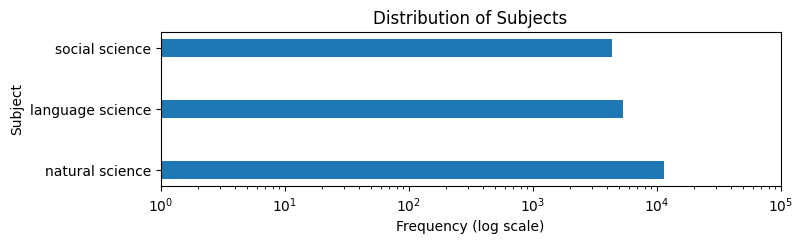

In [57]:
from matplotlib import pyplot as plt
%matplotlib inline

# Plot
plt.figure(figsize=(8, 2))
plt.barh(subjects_count.index, subjects_count.values, height=0.3)
plt.xscale('log')
plt.xlim([1, 100000])
plt.xlabel('Frequency (log scale)')
plt.ylabel('Subject')
plt.title('Distribution of Subjects')
plt.show()

### Distribution of Tasks

Heavily Dominated by One Task Type:

- Closed choice: 20,404 samples

- Yes or no: 600 samples

- True or false: 204 samples

That’s **over 96%** of the dataset being a **multiple-choice** (closed choice) task.

Binary Tasks Are Rare:

- Yes/No and True/False questions are minimal.

- This suggests the dataset is almost entirely built for **multi-option** selection, not binary classification

Modeling Bias:

- Any model trained without separating task types might overfit to multiple-choice style and struggle with binary formats.

- For a general-purpose QA system, we could train separate models per task type to avoid this bias.

In [41]:
tasks_count

task
closed choice    20404
yes or no          600
true-or false      204
Name: count, dtype: int64

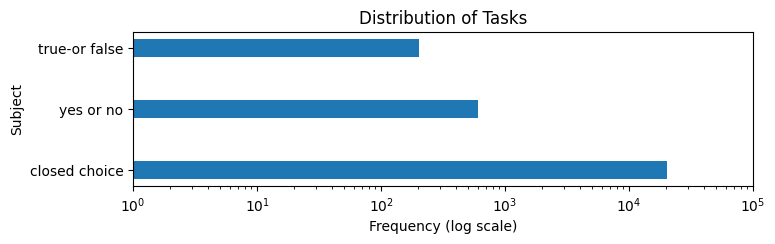

In [58]:
from matplotlib import pyplot as plt
%matplotlib inline

# Plot
plt.figure(figsize=(8, 2))
plt.barh(tasks_count.index, tasks_count.values, height=0.3)
plt.xscale('log')
plt.xlim([1, 100000])
plt.xlabel('Frequency (log scale)')
plt.ylabel('Subject')
plt.title('Distribution of Tasks')
plt.show()

### Distribution of Grades

Strong Emphasis on Middle Grades 3-7:

- The most represented grades are Grade 4 (3,544), Grade 5 (3,086), and Grade 3 (3,032).

- This suggests a targeted focus on elementary to early middle school levels.

Tapering in Lower and Higher Grades:

- Grade 1 is barely present (95 samples), and the same drop-off occurs past Grade 8.

- Grades 9–12 are all under 600 samples each, indicating less content for high school levels.

In [42]:
grades_count

grade
grade4     3544
grade5     3086
grade3     3032
grade7     2749
grade8     2546
grade6     2450
grade2     1678
grade10     558
grade11     539
grade9      491
grade12     440
grade1       95
Name: count, dtype: int64

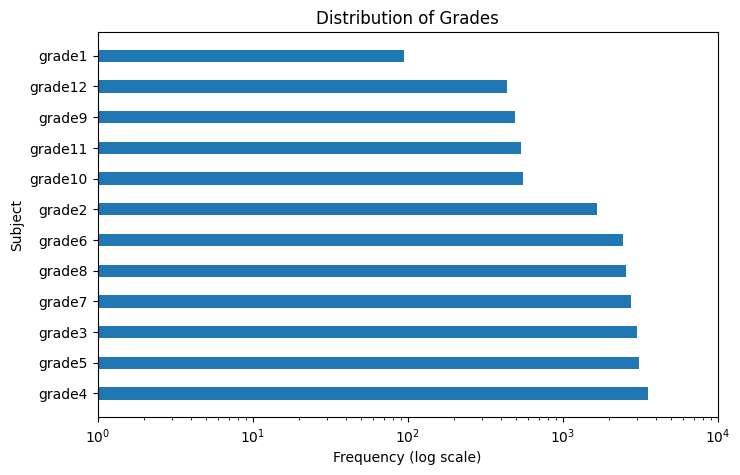

In [63]:
from matplotlib import pyplot as plt
%matplotlib inline

# Plot
plt.figure(figsize=(8, 5))
plt.barh(grades_count.index, grades_count.values, height=0.4)
plt.xscale('log')
plt.xlim([1, 10000])
plt.xlabel('Frequency (log scale)')
plt.ylabel('Subject')
plt.title('Distribution of Grades')
plt.show()

### Distribution of Topics

The topics distribution is highly skewed:

- A few topics dominate:

> Biology (4098), Physics (3215), Geography (2956)
> Together, these three topics account for ~77% of all samples.
> 
> The bottom half — topics like Culture, Global Studies, Pronouns, etc. — have fewer than 100 samples each.

- STEM-Focused:

> Science-heavy subjects like Biology, Physics, Chemistry, Earth Science, and Engineering Practices make up the bulk of the data.
> 
> This suggests a strong orientation toward STEM (Science, Technology, Engineering, and Mathematics) in the dataset.

- Underrepresented Topics:

> Topics like Culture (9 samples) or Global Studies (2 samples) are so sparse that it would be very difficult to train a reliable model on them.
> 
> Models trained on this data may perform poorly for these underrepresented classes unless you address the imbalance.

- Moderate Representation:

> Some language topics like Writing Strategies and Figurative Language are moderately represented, hinting at a cross-disciplinary design — possibly a mix of science and language learning.

In [43]:
topics_count

topic
biology                              4098
physics                              3215
geography                            2956
writing-strategies                   1650
figurative-language                  1260
chemistry                            1194
earth-science                        1152
science-and-engineering-practices     924
units-and-measurement                 870
reference-skills                      724
economics                             682
punctuation                           514
us-history                            510
grammar                               379
verbs                                 251
capitalization                        198
vocabulary                            162
civics                                126
phonological-awareness                 97
reading-comprehension                  84
world-history                          65
word-study                             39
literacy-in-science                    34
pronouns                    

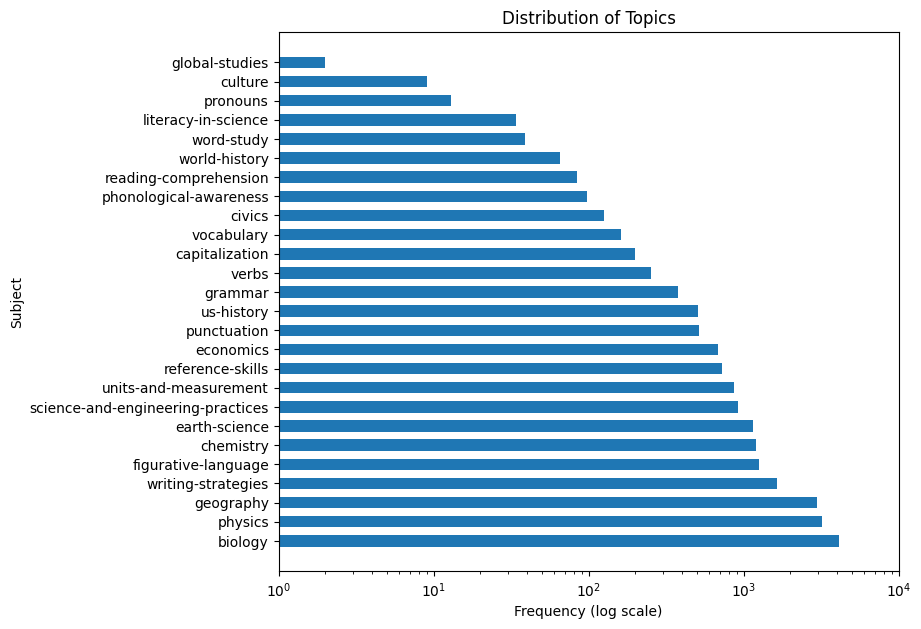

In [65]:
from matplotlib import pyplot as plt
%matplotlib inline

# Plot
plt.figure(figsize=(8, 7))
plt.barh(topics_count.index, topics_count.values, height=0.6)
plt.xscale('log')
plt.xlim([1, 10000])
plt.xlabel('Frequency (log scale)')
plt.ylabel('Subject')
plt.title('Distribution of Topics')
plt.show()

### Distribution of Categories

We can observe severe imbalance among the categories:

- A few categories (like State capitals, Literary devices, and Genes to traits) have extremely high frequency (close to 1000 instances).
- Meanwhile, many categories (like Islamic empires, Electricity, Ancient South Asia) have very few examples — sometimes less than 10.

We can predict that the models we are going to train will do great on common topics, but struggle on niche or advanced topics.

In [ ]:
categories_count

category
State capitals           1475
Literary devices         1260
Genes to traits           958
Units and measurement     845
Classification            835
                         ... 
Ancient South Asia          1
The Constitution            1
Topographic maps            1
Banking and finance         1
Electricity                 1
Name: count, Length: 127, dtype: int64

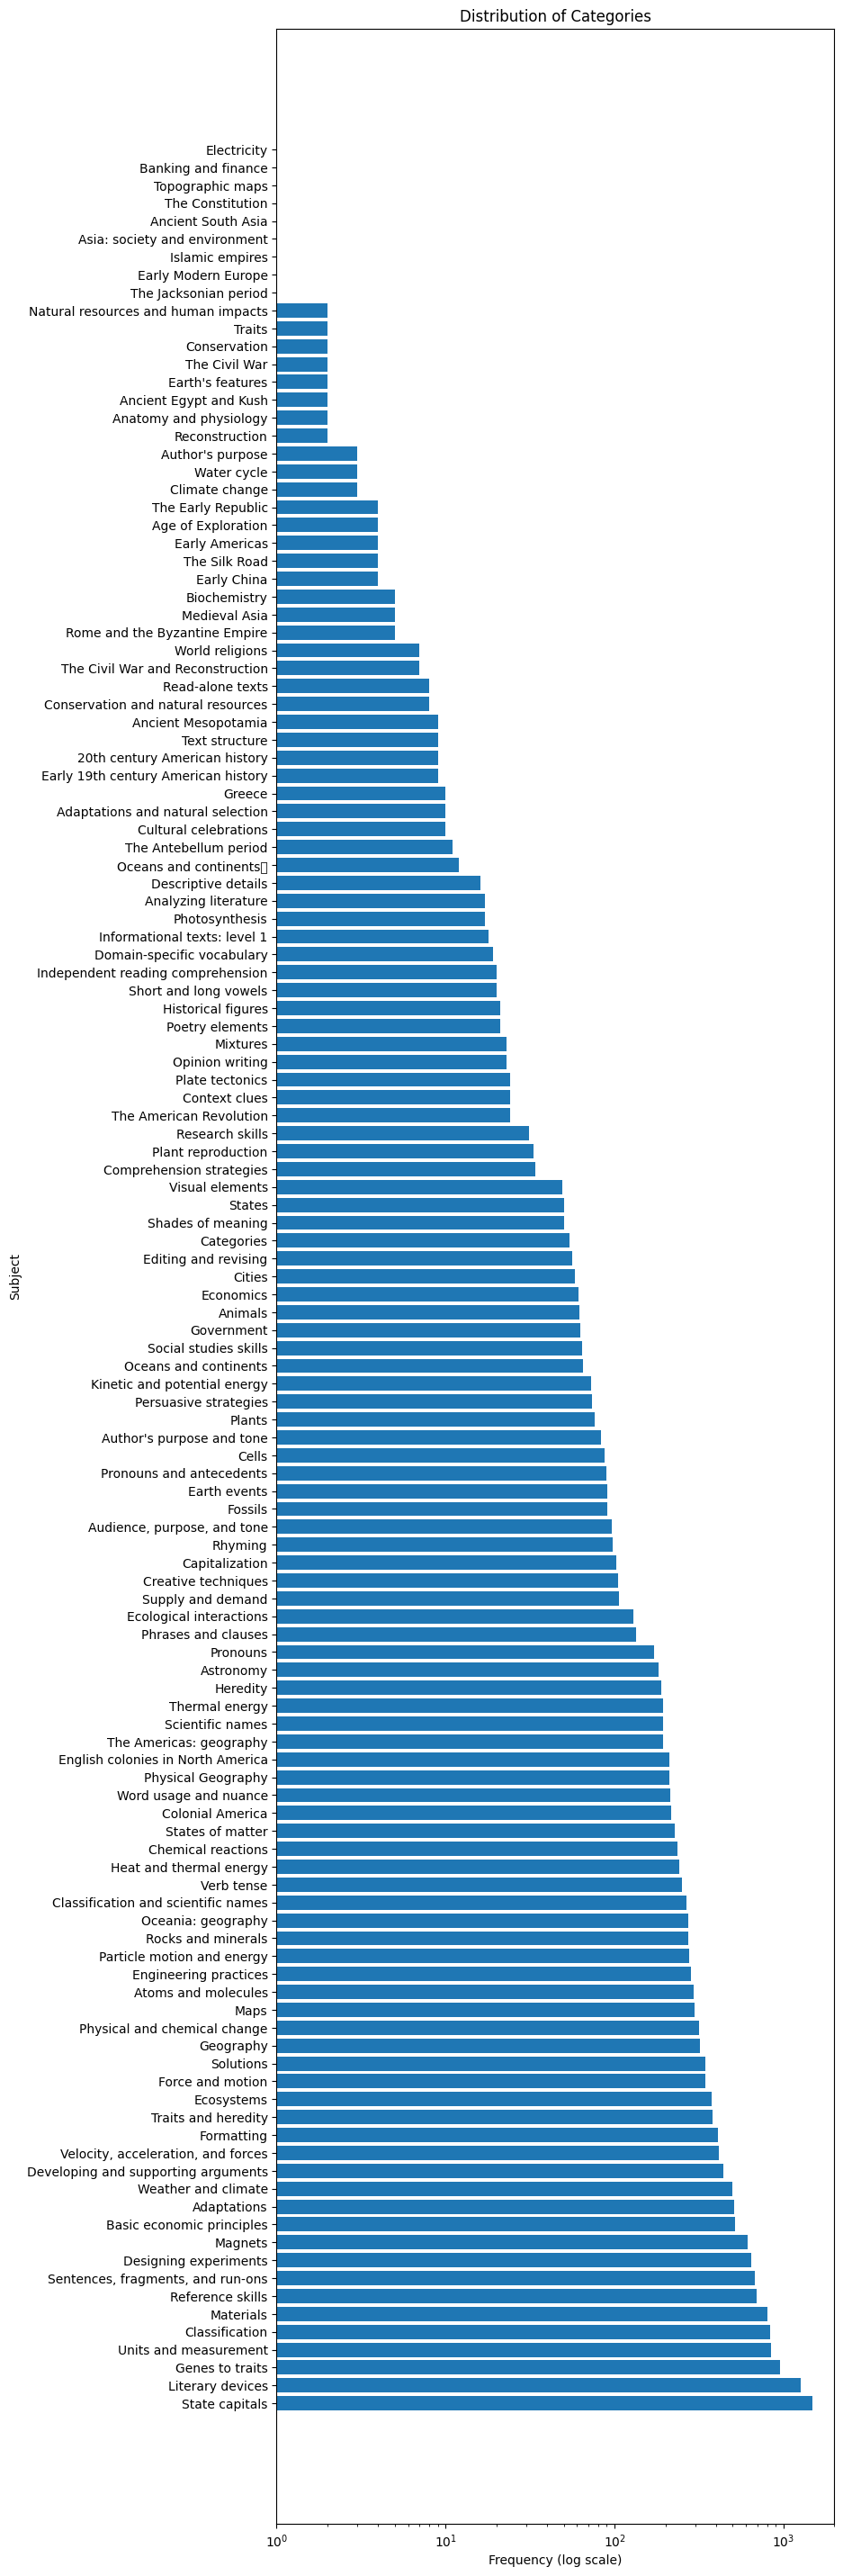

In [74]:
from matplotlib import pyplot as plt
%matplotlib inline

# Plot
plt.figure(figsize=(8, 36))
plt.barh(categories_count.index, categories_count.values, height=0.8)
plt.xscale('log')
plt.xlim([1, 2000])
plt.xlabel('Frequency (log scale)')
plt.ylabel('Subject')
plt.title('Distribution of Categories')
plt.show()